<a href="https://colab.research.google.com/github/viddev1/tensorflow_notebooks/blob/main/notebooks/tf_transfer_learning_fine_tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Tue Jun 21 07:53:16 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
# Get helper_functions.py script from course GitHub
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py 

# Import helper functions we're going to use
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, walk_through_dir

--2022-06-21 07:54:08--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2022-06-21 07:54:08 (101 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [4]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

--2022-06-21 08:04:14--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.200.128, 74.125.68.128, 74.125.24.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.200.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M   176MB/s    in 0.9s    

2022-06-21 08:04:15 (176 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [5]:
unzip_data("10_food_classes_10_percent.zip")

In [ ]:
walk_through_dir("10_food_classes_10_percent")

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/test'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_10_percent

In [7]:
train_dir_10_percent = "10_food_classes_10_percent/train/"
test_dir = "10_food_classes_10_percent/test/"

In [ ]:
import tensorflow as tf
IMG_SIZE = (224, 224)
train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,
                                                                            image_size=IMG_SIZE,
                                                                            label_mode="categorical",
                                                                            batch_size=32)
test_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,
                                                                           image_size=IMG_SIZE,
                                                                           label_mode="categorical")

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
train_data_10_percent, test_data_10_percent

(<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>,
 <BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>)

In [ ]:
train_data_10_percent.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [ ]:
for images, labels in train_data_10_percent.take(1):
  print(images, labels)

tf.Tensor(
[[[[7.44454727e+01 5.54454727e+01 2.32187500e+01]
   [7.20966187e+01 5.34241066e+01 1.94416447e+01]
   [8.41734695e+01 6.61734695e+01 2.80223198e+01]
   ...
   [1.14333401e+01 6.43334055e+00 2.43334031e+00]
   [1.03064327e+01 5.30643272e+00 1.30643284e+00]
   [1.00580359e+01 5.05803585e+00 1.05803585e+00]]

  [[7.52471313e+01 5.52471313e+01 2.08453445e+01]
   [7.42598877e+01 5.42598877e+01 1.91438122e+01]
   [8.27920990e+01 6.30519791e+01 2.52474499e+01]
   ...
   [8.78573608e+00 4.78573608e+00 1.78573608e+00]
   [1.09378176e+01 6.93781805e+00 3.93781805e+00]
   [1.04106789e+01 6.41067886e+00 3.43140793e+00]]

  [[7.16881332e+01 5.01613541e+01 1.23488522e+01]
   [7.64177322e+01 5.48909454e+01 1.63641586e+01]
   [8.72863541e+01 6.64869232e+01 2.54585457e+01]
   ...
   [5.73216438e+00 4.02234316e+00 4.22517776e-01]
   [6.87498665e+00 5.16516542e+00 1.40177250e+00]
   [4.35264349e+00 2.64282227e+00 0.00000000e+00]]

  ...

  [[1.01370224e+02 7.43702240e+01 3.37022614e+00]
   [1

In [ ]:
base_model = tf.keras.applications.EfficientNetB0(include_top=False)

base_model.trainable=False

inputs = tf.keras.layers.Input(shape=(224, 224, 3), name='input layer')

x = base_model(inputs)

print(f"shape after base model: {x.shape}")

x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
print(f"After GlobalAveragePooling Layer: {x.shape}")

outputs = tf.keras.layers.Dense(10, activation="softmax", name="output_layer")(x)

model_0 = tf.keras.Model(inputs, outputs)

model_0.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"]
                )

history_10_percent = model_0.fit(train_data_10_percent,
                                 epochs=5,
                                 steps_per_epoch=len(train_data_10_percent),
                                 validation_data=test_data_10_percent,
                                 validation_steps=len(test_data_10_percent),
                                 callbacks=[create_tensorboard_callback("transfer_learning", "10_percent_feature_extract")]
                                 )

16719872/16705208 [==============================] - 0s 0us/step
shape after base model: (None, 7, 7, 1280)
After GlobalAveragePooling Layer: (None, 1280)
Saving TensorBoard log files to: transfer_learning/10_percent_feature_extract/20220530-015447
Epoch 1/5
24/24 [==============================] - 26s 436ms/step - loss: 1.8738 - accuracy: 0.4253 - val_loss: 1.3190 - val_accuracy: 0.7144
Epoch 2/5
24/24 [==============================] - 14s 541ms/step - loss: 1.1203 - accuracy: 0.7587 - val_loss: 0.9095 - val_accuracy: 0.8004
Epoch 3/5
24/24 [==============================] - 11s 461ms/step - loss: 0.8260 - accuracy: 0.8133 - val_loss: 0.7392 - val_accuracy: 0.8260
Epoch 4/5
24/24 [==============================] - 8s 337ms/step - loss: 0.6681 - accuracy: 0.8427 - val_loss: 0.6544 - val_accuracy: 0.8364
Epoch 5/5
24/24 [==============================] - 8s 327ms/step - loss: 0.5721 - accuracy: 0.8653 - val_loss: 0.5968 - val_accuracy: 0.8420


In [ ]:
for layer_number, layer in enumerate(base_model.layers):
  print(layer_number, layer.name)

0 <keras.engine.input_layer.InputLayer object at 0x7f14095dd750>
1 <keras.layers.preprocessing.image_preprocessing.Rescaling object at 0x7f140b251f90>
2 <keras.layers.preprocessing.normalization.Normalization object at 0x7f14097d6d50>
3 <keras.layers.convolutional.ZeroPadding2D object at 0x7f14095f0510>
4 <keras.layers.convolutional.Conv2D object at 0x7f1409767a50>
5 <keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7f1409778c90>
6 <keras.layers.core.activation.Activation object at 0x7f140891df90>
7 <keras.layers.convolutional.DepthwiseConv2D object at 0x7f14088ed490>
8 <keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7f14088ed910>
9 <keras.layers.core.activation.Activation object at 0x7f140888b210>
10 <keras.layers.pooling.GlobalAveragePooling2D object at 0x7f140888bd10>
11 <keras.layers.core.reshape.Reshape object at 0x7f1408901790>
12 <keras.layers.convolutional.Conv2D object at 0x7f1408894dd0>
13 <keras.layers.convolutional

In [ ]:
base_model.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 rescaling (Rescaling)          (None, None, None,   0           ['input_1[0][0]']                
                                3)                                                                
                                                                                                  
 normalization (Normalization)  (None, None, None,   7           ['rescaling[0][0]']              
                                3)                                                   

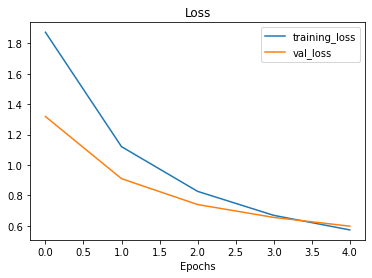

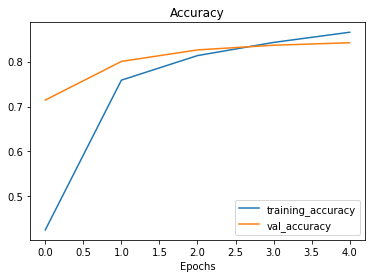

In [ ]:
plot_loss_curves(history_10_percent)

In [ ]:
model_0.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling_laye  (None, 1280)             0         
 r (GlobalAveragePooling2D)                                      
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-trainable params: 4,049,571
_________________________________________________________________


In [ ]:
input_shape = (1, 4, 4, 3)

tf.random.set_seed(42)
input_tensor =  tf.random.normal(input_shape)
print(f"Random input tensor:\n {input_tensor} \n")

global_avg_pooled_tensor = tf.keras.layers.GlobalAveragePooling2D()(input_tensor)
print(f"2D global average pooled random tensor: \n {global_avg_pooled_tensor} \n")

print(f"Shape of input random tensor: {input_tensor.shape} ")
print(f"Shape of 2D global avergaed pooled input tensor: {global_avg_pooled_tensor.shape} ")

Random input tensor:
 [[[[ 0.3274685  -0.8426258   0.3194337 ]
   [-1.4075519  -2.3880599  -1.0392479 ]
   [-0.5573232   0.539707    1.6994323 ]
   [ 0.28893656 -1.5066116  -0.2645474 ]]

  [[-0.59722406 -1.9171132  -0.62044144]
   [ 0.8504023  -0.40604794 -3.0258412 ]
   [ 0.9058464   0.29855987 -0.22561555]
   [-0.7616443  -1.8917141  -0.93847126]]

  [[ 0.77852213 -0.47338897  0.97772694]
   [ 0.24694404  0.20573747 -0.5256233 ]
   [ 0.32410017  0.02545409 -0.10638497]
   [-0.6369475   1.1603122   0.2507359 ]]

  [[-0.41728503  0.4012578  -1.4145443 ]
   [-0.5931857  -1.6617213   0.33567193]
   [ 0.10815629  0.23479682 -0.56668764]
   [-0.35819843  0.88698614  0.52744764]]]] 

2D global average pooled random tensor: 
 [[-0.09368646 -0.45840448 -0.2885598 ]] 

Shape of input random tensor: (1, 4, 4, 3) 
Shape of 2D global avergaed pooled input tensor: (1, 3) 


In [ ]:
tf.reduce_mean(input_tensor, axis=[1,2])

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[-0.09368646, -0.45840448, -0.2885598 ]], dtype=float32)>

In [ ]:
input_shape = (1, 4, 4, 3)

tf.random.set_seed(42)
input_tensor =  tf.random.normal(input_shape)
print(f"Random input tensor:\n {input_tensor} \n")

global_avg_pooled_tensor = tf.keras.layers.GlobalMaxPooling2D()(input_tensor)
print(f"2D global max pooled random tensor: \n {global_avg_pooled_tensor} \n")

print(f"Shape of input random tensor: {input_tensor.shape} ")
print(f"Shape of 2D global max pooled input tensor: {global_avg_pooled_tensor.shape} ")

Random input tensor:
 [[[[ 0.3274685  -0.8426258   0.3194337 ]
   [-1.4075519  -2.3880599  -1.0392479 ]
   [-0.5573232   0.539707    1.6994323 ]
   [ 0.28893656 -1.5066116  -0.2645474 ]]

  [[-0.59722406 -1.9171132  -0.62044144]
   [ 0.8504023  -0.40604794 -3.0258412 ]
   [ 0.9058464   0.29855987 -0.22561555]
   [-0.7616443  -1.8917141  -0.93847126]]

  [[ 0.77852213 -0.47338897  0.97772694]
   [ 0.24694404  0.20573747 -0.5256233 ]
   [ 0.32410017  0.02545409 -0.10638497]
   [-0.6369475   1.1603122   0.2507359 ]]

  [[-0.41728503  0.4012578  -1.4145443 ]
   [-0.5931857  -1.6617213   0.33567193]
   [ 0.10815629  0.23479682 -0.56668764]
   [-0.35819843  0.88698614  0.52744764]]]] 

2D global max pooled random tensor: 
 [[0.9058464 1.1603122 1.6994323]] 

Shape of input random tensor: (1, 4, 4, 3) 
Shape of 2D global max pooled input tensor: (1, 3) 


In [ ]:
tf.reduce_max(input_tensor, axis=[1,2])

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[0.9058464, 1.1603122, 1.6994323]], dtype=float32)>

In [ ]:
# Download and unzip data
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
unzip_data("10_food_classes_1_percent.zip")

# Create training and test dirs
train_dir_1_percent = "10_food_classes_1_percent/train/"
test_dir = "10_food_classes_1_percent/test/"

--2022-05-31 08:45:57--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.111.128, 142.251.45.112, 142.251.16.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.111.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133612354 (127M) [application/zip]
Saving to: ‘10_food_classes_1_percent.zip’

10_food_classes_1_p 100%[===================>] 127.42M   279MB/s    in 0.5s    

2022-05-31 08:45:58 (279 MB/s) - ‘10_food_classes_1_percent.zip’ saved [133612354/133612354]



In [ ]:
walk_through_dir("10_food_classes_1_percent")

There are 2 directories and 0 images in '10_food_classes_1_percent'.
There are 10 directories and 0 images in '10_food_classes_1_percent/test'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/steak'

In [ ]:
import tensorflow as tf
IMG_SIZE = (224, 224)
train_data_1_percent = tf.keras.preprocessing.image_dataset_from_directory(train_dir_1_percent,
                                                                           label_mode="categorical",
                                                                           batch_size=32,
                                                                           image_size=IMG_SIZE)
test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                label_mode="categorical",
                                                                image_size=IMG_SIZE)

Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
print(tf.__version__)

2.8.0


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
#from tensorflow.keras.layers.experimental import preprocessing

data_aug = keras.Sequential([
                                      layers.RandomFlip("horizontal"),
                                      layers.RandomRotation(0.2),
                                      layers.RandomZoom(0.2),
                                      layers.RandomHeight(0.2),
                                      layers.RandomWidth(0.2),
                                      #layers.Rescaling(1.0/255)
], name="data_augmentation")

(-0.5, 509.5, 522.5, -0.5)

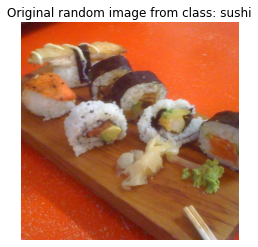

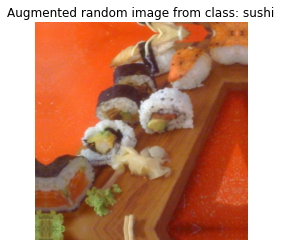

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random

target_class = random.choice(train_data_1_percent.class_names)

target_dir="10_food_classes_1_percent/train/" + target_class
random_image= random.choice(os.listdir(target_dir))
random_image_path = target_dir + "/" + random_image
img = mpimg.imread(random_image_path)
plt.imshow(img)
plt.title(f"Original random image from class: {target_class}")
plt.axis(False)

augmented_img = data_aug(tf.cast(tf.expand_dims(img, axis=0), tf.float32))
plt.figure()
plt.imshow(tf.squeeze(augmented_img)/255.)
plt.title(f"Augmented random image from class: {target_class}")
plt.axis(False)

In [ ]:
input_shape = (224, 224, 3)
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

inputs = layers.Input(shape=input_shape, name='input_layer')

x = data_aug(inputs)

x = base_model(x, training=False)

x = layers.GlobalAveragePooling2D(name = "global_average_pooling_layer")(x)

outputs = layers.Dense(10, activation="softmax", name="output_layer")(x)

model_1 = keras.Model(inputs, outputs)

model_1.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy']
                )

history_1_percent = model_1.fit(train_data_1_percent,
                                epochs=5,
                                steps_per_epoch=len(train_data_1_percent),
                                validation_data=test_data,
                                validation_steps=int(0.25*len(test_data)),
                                callbacks=[create_tensorboard_callback("transfer_learning", "1_percent_data_augmented")])

Saving TensorBoard log files to: transfer_learning/1_percent_data_augmented/20220531-084812
Epoch 1/5
3/3 [==============================] - 18s 3s/step - loss: 2.4123 - accuracy: 0.0857 - val_loss: 2.2780 - val_accuracy: 0.1234
Epoch 2/5
3/3 [==============================] - 6s 3s/step - loss: 2.1622 - accuracy: 0.1429 - val_loss: 2.1593 - val_accuracy: 0.2188
Epoch 3/5
3/3 [==============================] - 4s 2s/step - loss: 1.9817 - accuracy: 0.3571 - val_loss: 2.0672 - val_accuracy: 0.3109
Epoch 4/5
3/3 [==============================] - 4s 1s/step - loss: 1.8021 - accuracy: 0.5000 - val_loss: 1.9811 - val_accuracy: 0.3520
Epoch 5/5
3/3 [==============================] - 3s 1s/step - loss: 1.6890 - accuracy: 0.5857 - val_loss: 1.8707 - val_accuracy: 0.4161


In [ ]:
!tensorboard dev upload --logdir ./transfer_learning/ \
  --name "model_1 data aug 1 percent results" \
  --description "Model_1 TF Hub Feature Extractor model actitectures using 1% of augmented training data images" \
  --one_shot


New experiment created. View your TensorBoard at: https://tensorboard.dev/experiment/D9te1VpGT9qvLDD0ulWanA/

[2022-05-31T08:51:26] Started scanning logdir.
[2022-05-31T08:51:28] Total uploaded: 60 scalars, 0 tensors, 2 binary objects (1.6 MB)
[2022-05-31T08:51:28] Done scanning logdir.


Done. View your TensorBoard at https://tensorboard.dev/experiment/D9te1VpGT9qvLDD0ulWanA/


In [ ]:
!tensorboard dev list

https://tensorboard.dev/experiment/D9te1VpGT9qvLDD0ulWanA/
	Name                 model_1 data aug 1 percent results
	Description          Comparing two different TF Hub Feature Extractor model actitectures using 10% of training data images
	Id                   D9te1VpGT9qvLDD0ulWanA
	Created              2022-05-31 08:51:26 (22 seconds ago)
	Updated              2022-05-31 08:51:28 (20 seconds ago)
	Runs                 4
	Tags                 5
	Scalars              60
	Tensor bytes         0
	Binary object bytes  1722188
Total: 1 experiment(s)


In [ ]:
!tensorboard dev delete --experiment_id D9te1VpGT9qvLDD0ulWanA

Deleted experiment D9te1VpGT9qvLDD0ulWanA.


In [ ]:
model_1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequenti  (None, None, None, 3)    0         
 al)                                                             
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling_laye  (None, 1280)             0         
 r (GlobalAveragePooling2D)                                      
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-trainabl

In [ ]:
data_aug(inputs)

<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'data_augmentation')>

In [ ]:
##printing output from random layer in tf model
from keras import Model
model_output = model_1.get_layer("input_layer").output
m = Model(inputs=model_1.input, outputs=model_output)
pred = m.predict(train_data_1_percent)

In [ ]:
results_1_percent_data_aug = model_1.evaluate(test_data)
results_1_percent_data_aug

79/79 [==============================] - 8s 90ms/step - loss: 1.8801 - accuracy: 0.4072


[1.880110502243042, 0.40720000863075256]

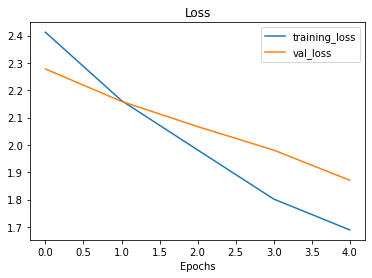

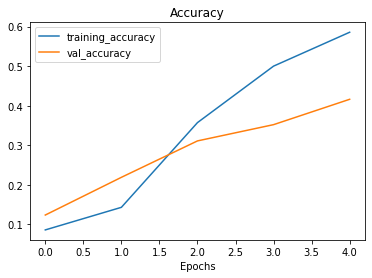

In [ ]:
plot_loss_curves(history_1_percent)

In [8]:
import tensorflow as tf
IMG_SIZE = (224, 224)
train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(train_dir_10_percent,
                                                                            label_mode="categorical",
                                                                            image_size=IMG_SIZE
                                                                            )
test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                label_mode="categorical",
                                                                image_size=IMG_SIZE)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [9]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

data_agmnt = Sequential([
                         layers.RandomFlip('horizontal'),
                         layers.RandomHeight(0.2),
                         layers.RandomWidth(0.2),
                         layers.RandomZoom(0.2),
                         layers.RandomRotation(0.2),
                         #layers.Rescaling(1./255)
], name="data_augmentation")

input_shape = (224, 224, 3)

base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

inputs = layers.Input(shape=input_shape, name="input_layer")

x = data_agmnt(inputs)
x = base_model(x, training=False)
x = layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)

outputs = layers.Dense(10, activation="softmax", name="output_layer")(x)

model_2 = tf.keras.Model(inputs, outputs)

model_2.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=['accuracy'])

16719872/16705208 [==============================] - 0s 0us/step


In [10]:
checkpoint_path = "ten_percent_model_checkpoint_weights/checkpoint.ckpt"
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                         save_weights_only=True,
                                                         save_best_only=False,
                                                         save_freq="epoch",
                                                         verbose=1)

In [11]:
init_epochs = 5
history_10_percent_data_aug = model_2.fit(train_data_10_percent,
                                          epochs=init_epochs,
                                          validation_data=test_data,
                                          validation_steps=int(0.25 * len(test_data)),
                                          callbacks=[create_tensorboard_callback("transfer_learning", "10percent_data_aug"),
                                                     checkpoint_callback]
                                          )

Saving TensorBoard log files to: transfer_learning/10percent_data_aug/20220621-080547
Epoch 1/5
24/24 [==============================] - ETA: 0s - loss: 2.0207 - accuracy: 0.3253
Epoch 1: saving model to ten_percent_model_checkpoint_weights/checkpoint.ckpt
24/24 [==============================] - 32s 606ms/step - loss: 2.0207 - accuracy: 0.3253 - val_loss: 1.4618 - val_accuracy: 0.6628
Epoch 2/5
24/24 [==============================] - ETA: 0s - loss: 1.3903 - accuracy: 0.6613
Epoch 2: saving model to ten_percent_model_checkpoint_weights/checkpoint.ckpt
24/24 [==============================] - 11s 461ms/step - loss: 1.3903 - accuracy: 0.6613 - val_loss: 1.0497 - val_accuracy: 0.7516
Epoch 3/5
24/24 [==============================] - ETA: 0s - loss: 1.0791 - accuracy: 0.7480
Epoch 3: saving model to ten_percent_model_checkpoint_weights/checkpoint.ckpt
24/24 [==============================] - 10s 411ms/step - loss: 1.0791 - accuracy: 0.7480 - val_loss: 0.8514 - val_accuracy: 0.7780
Epoch

In [ ]:
!tensorboard dev upload --logdir ./transfer_learning/ \
  --name "tf feature extractor model run comparison" \
  --description "abc def ghi" \
  --one_shot


New experiment created. View your TensorBoard at: https://tensorboard.dev/experiment/qnU4k8liQbOXoE4PFzEnxw/

[2022-05-31T09:21:42] Started scanning logdir.
[2022-05-31T09:21:45] Total uploaded: 90 scalars, 0 tensors, 3 binary objects (2.5 MB)
[2022-05-31T09:21:45] Done scanning logdir.


Done. View your TensorBoard at https://tensorboard.dev/experiment/qnU4k8liQbOXoE4PFzEnxw/


In [ ]:
!tensorboard dev list

https://tensorboard.dev/experiment/qnU4k8liQbOXoE4PFzEnxw/
	Name                 tf feature extractor model run comparison
	Description          abc def ghi
	Id                   qnU4k8liQbOXoE4PFzEnxw
	Created              2022-05-31 09:21:42 (22 seconds ago)
	Updated              2022-05-31 09:21:45 (19 seconds ago)
	Runs                 6
	Tags                 5
	Scalars              90
	Tensor bytes         0
	Binary object bytes  2592260
Total: 1 experiment(s)


In [ ]:
!tensorboard dev delete --experiment_id "qnU4k8liQbOXoE4PFzEnxw"

Deleted experiment qnU4k8liQbOXoE4PFzEnxw.


In [12]:
result_10_percent_data_aug = model_2.evaluate(test_data)
result_10_percent_data_aug

79/79 [==============================] - 7s 77ms/step - loss: 0.7094 - accuracy: 0.8140


[0.7094411849975586, 0.8140000104904175]

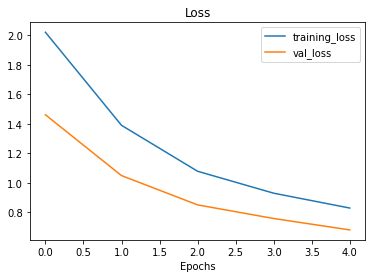

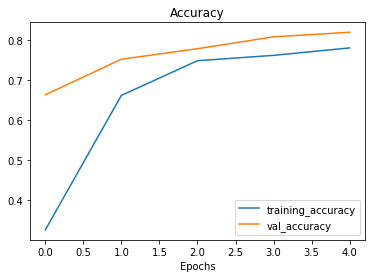

In [13]:
plot_loss_curves(history_10_percent_data_aug)

In [17]:
model_2.load_weights(checkpoint_path)
loaded_weights_model_result = model_2.evaluate(test_data)

79/79 [==============================] - 6s 73ms/step - loss: 0.7094 - accuracy: 0.8140


In [16]:
result_10_percent_data_aug == loaded_weights_model_result

True

In [20]:
import numpy as np
# Check to see if loaded model results are very close to native model results (should output True)
np.isclose(np.array(result_10_percent_data_aug), np.array(loaded_weights_model_result))

array([ True,  True])

In [22]:
# Check the difference between the two results
print(np.array(result_10_percent_data_aug) - np.array(loaded_weights_model_result))

[-1.1920929e-07  0.0000000e+00]


**Model 3 : Fine Tuning exisitng model with 10% data**

In [23]:
model_2.layers

In [24]:
for layer in model_2.layers:
  print(layer.trainable)

True
True
False
True
True


In [25]:
model_2.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequenti  (None, 224, 224, 3)      0         
 al)                                                             
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling_laye  (None, 1280)             0         
 r (GlobalAveragePooling2D)                                      
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-trainabl

In [27]:
print(len(model_2.layers[2].trainable_variables))

0


In [29]:
print(len(base_model.trainable_variables))

0


In [31]:
for layer_number, layer in enumerate(base_model.layers):
  print(layer_number, layer.name, layer.trainable)

0 input_1 False
1 rescaling False
2 normalization False
3 stem_conv_pad False
4 stem_conv False
5 stem_bn False
6 stem_activation False
7 block1a_dwconv False
8 block1a_bn False
9 block1a_activation False
10 block1a_se_squeeze False
11 block1a_se_reshape False
12 block1a_se_reduce False
13 block1a_se_expand False
14 block1a_se_excite False
15 block1a_project_conv False
16 block1a_project_bn False
17 block2a_expand_conv False
18 block2a_expand_bn False
19 block2a_expand_activation False
20 block2a_dwconv_pad False
21 block2a_dwconv False
22 block2a_bn False
23 block2a_activation False
24 block2a_se_squeeze False
25 block2a_se_reshape False
26 block2a_se_reduce False
27 block2a_se_expand False
28 block2a_se_excite False
29 block2a_project_conv False
30 block2a_project_bn False
31 block2b_expand_conv False
32 block2b_expand_bn False
33 block2b_expand_activation False
34 block2b_dwconv False
35 block2b_bn False
36 block2b_activation False
37 block2b_se_squeeze False
38 block2b_se_reshape F

In [33]:
base_model.trainable=True

for layer in base_model.layers[:-10]:
  layer.trainable=False

model_2.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                metrics=['accuracy']

)

In [35]:
for layer_number, layer in enumerate(base_model.layers):
  print(layer_number, layer.name, layer.trainable)

0 input_1 False
1 rescaling False
2 normalization False
3 stem_conv_pad False
4 stem_conv False
5 stem_bn False
6 stem_activation False
7 block1a_dwconv False
8 block1a_bn False
9 block1a_activation False
10 block1a_se_squeeze False
11 block1a_se_reshape False
12 block1a_se_reduce False
13 block1a_se_expand False
14 block1a_se_excite False
15 block1a_project_conv False
16 block1a_project_bn False
17 block2a_expand_conv False
18 block2a_expand_bn False
19 block2a_expand_activation False
20 block2a_dwconv_pad False
21 block2a_dwconv False
22 block2a_bn False
23 block2a_activation False
24 block2a_se_squeeze False
25 block2a_se_reshape False
26 block2a_se_reduce False
27 block2a_se_expand False
28 block2a_se_excite False
29 block2a_project_conv False
30 block2a_project_bn False
31 block2b_expand_conv False
32 block2b_expand_bn False
33 block2b_expand_activation False
34 block2b_dwconv False
35 block2b_bn False
36 block2b_activation False
37 block2b_se_squeeze False
38 block2b_se_reshape F

In [36]:
print(len(model_2.trainable_variables))

12


In [39]:
fine_tune_epochs = init_epochs + 5
history_fine_tune_10_percent_data_aug = model_2.fit(
    train_data_10_percent,
    epochs= fine_tune_epochs,
    validation_data= test_data,
    initial_epoch= history_10_percent_data_aug.epoch[-1],
    validation_steps=int(0.25 * len(test_data)),
    callbacks=[create_tensorboard_callback("transfer_learning", "10_percent_fine_tune_last_10")]
)

Saving TensorBoard log files to: transfer_learning/10_percent_fine_tune_last_10/20220621-082815
Epoch 5/10
24/24 [==============================] - 18s 446ms/step - loss: 0.7104 - accuracy: 0.7907 - val_loss: 0.5408 - val_accuracy: 0.8273
Epoch 6/10
24/24 [==============================] - 8s 317ms/step - loss: 0.5841 - accuracy: 0.8307 - val_loss: 0.5058 - val_accuracy: 0.8289
Epoch 7/10
24/24 [==============================] - 9s 362ms/step - loss: 0.4702 - accuracy: 0.8520 - val_loss: 0.4718 - val_accuracy: 0.8306
Epoch 8/10
24/24 [==============================] - 9s 358ms/step - loss: 0.4518 - accuracy: 0.8547 - val_loss: 0.5082 - val_accuracy: 0.8240
Epoch 9/10
24/24 [==============================] - 9s 365ms/step - loss: 0.3915 - accuracy: 0.8747 - val_loss: 0.4916 - val_accuracy: 0.8289
Epoch 10/10
24/24 [==============================] - 9s 377ms/step - loss: 0.3911 - accuracy: 0.8787 - val_loss: 0.4833 - val_accuracy: 0.8306


In [40]:
results_fine_tune_10_percent = model_2.evaluate(test_data)

79/79 [==============================] - 7s 85ms/step - loss: 0.4913 - accuracy: 0.8328


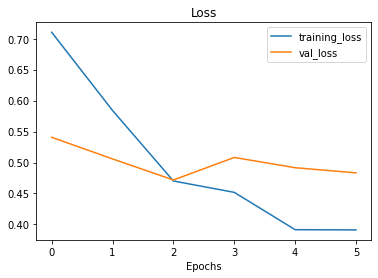

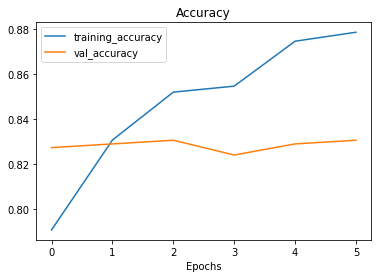

In [41]:
plot_loss_curves(history_fine_tune_10_percent_data_aug)

In [45]:
from matplotlib import pyplot as plt
def compare_historys(original_history, new_history, initial_epochs=5):
    """
    Compares two model history objects.
    """
    # Get original history measurements
    acc = original_history.history["accuracy"]
    loss = original_history.history["loss"]

    print(len(acc))

    val_acc = original_history.history["val_accuracy"]
    val_loss = original_history.history["val_loss"]

    # Combine original history with new history
    total_acc = acc + new_history.history["accuracy"]
    total_loss = loss + new_history.history["loss"]

    total_val_acc = val_acc + new_history.history["val_accuracy"]
    total_val_loss = val_loss + new_history.history["val_loss"]

    print(len(total_acc))
    print(total_acc)

    # Make plots
    plt.figure(figsize=(8, 8))
    plt.subplot(2, 1, 1)
    plt.plot(total_acc, label='Training Accuracy')
    plt.plot(total_val_acc, label='Validation Accuracy')
    plt.plot([initial_epochs-1, initial_epochs-1],
              plt.ylim(), label='Start Fine Tuning') # reshift plot around epochs
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(2, 1, 2)
    plt.plot(total_loss, label='Training Loss')
    plt.plot(total_val_loss, label='Validation Loss')
    plt.plot([initial_epochs-1, initial_epochs-1],
              plt.ylim(), label='Start Fine Tuning') # reshift plot around epochs
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.xlabel('epoch')
    plt.show()

5
11
[0.3253333270549774, 0.6613333225250244, 0.7480000257492065, 0.7613333463668823, 0.7799999713897705, 0.7906666398048401, 0.8306666612625122, 0.8519999980926514, 0.8546666502952576, 0.874666690826416, 0.8786666393280029]


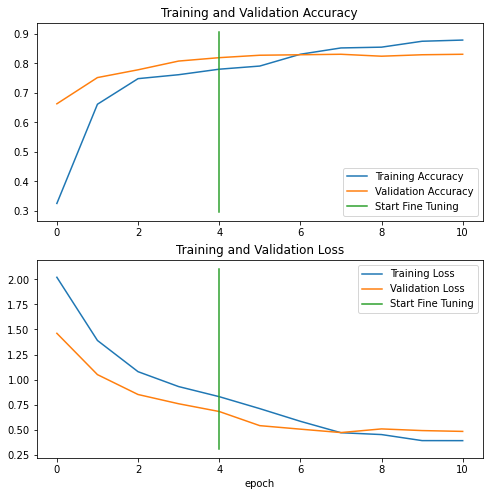

In [46]:
compare_historys(original_history=history_10_percent_data_aug, 
                 new_history=history_fine_tune_10_percent_data_aug, 
                 initial_epochs=5)

In [47]:
# Download and unzip 10 classes of data with all images
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip 
unzip_data("10_food_classes_all_data.zip")

# Setup data directories
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

--2022-06-21 08:33:43--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.200.128, 74.125.24.128, 142.251.10.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.200.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   216MB/s    in 2.3s    

2022-06-21 08:33:45 (216 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [48]:
# How many images are we working with now?
walk_through_dir("10_food_classes_all_data")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/train'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/fried_rice'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ramen'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_curry'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/grilled_salmon'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_wings'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/sushi'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/pizza'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ice_cream'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/hamburger'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/steak'.

In [49]:
import tensorflow as tf
IMG_SIZE = (224, 224)
train_data_10_classes_full = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                                 label_mode="categorical",
                                                                                 image_size=IMG_SIZE)

test_data =  tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                 label_mode="categorical",
                                                                 image_size=IMG_SIZE)

Found 7500 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [50]:
model_2.evaluate(test_data)

79/79 [==============================] - 7s 84ms/step - loss: 0.4913 - accuracy: 0.8328


[0.49127188324928284, 0.8327999711036682]

In [51]:
results_fine_tune_10_percent

[0.4912717640399933, 0.8327999711036682]

In [52]:
model_2.load_weights(checkpoint_path)

In [53]:
model_2.evaluate(test_data)

79/79 [==============================] - 10s 113ms/step - loss: 0.7094 - accuracy: 0.8140


[0.7094412446022034, 0.8140000104904175]

In [54]:
result_10_percent_data_aug

[0.7094411849975586, 0.8140000104904175]

In [55]:
for layer_number, layer in enumerate(model_2.layers):
  print(layer_number, layer.name, layer.trainable)

0 input_layer True
1 data_augmentation True
2 efficientnetb0 True
3 global_average_pooling_layer True
4 output_layer True


In [56]:
for layer_number, layer in enumerate(base_model.layers):
  print(layer_number, layer.name, layer.trainable)

0 input_1 False
1 rescaling False
2 normalization False
3 stem_conv_pad False
4 stem_conv False
5 stem_bn False
6 stem_activation False
7 block1a_dwconv False
8 block1a_bn False
9 block1a_activation False
10 block1a_se_squeeze False
11 block1a_se_reshape False
12 block1a_se_reduce False
13 block1a_se_expand False
14 block1a_se_excite False
15 block1a_project_conv False
16 block1a_project_bn False
17 block2a_expand_conv False
18 block2a_expand_bn False
19 block2a_expand_activation False
20 block2a_dwconv_pad False
21 block2a_dwconv False
22 block2a_bn False
23 block2a_activation False
24 block2a_se_squeeze False
25 block2a_se_reshape False
26 block2a_se_reduce False
27 block2a_se_expand False
28 block2a_se_excite False
29 block2a_project_conv False
30 block2a_project_bn False
31 block2b_expand_conv False
32 block2b_expand_bn False
33 block2b_expand_activation False
34 block2b_dwconv False
35 block2b_bn False
36 block2b_activation False
37 block2b_se_squeeze False
38 block2b_se_reshape F

In [57]:
model_2.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [58]:
fine_tune_epochs = init_epochs + 5
history_fine_tune_10_class_full = model_2.fit(train_data_10_classes_full,
                                              epochs=fine_tune_epochs,
                                              initial_epoch=history_10_percent_data_aug.epoch[-1],
                                              validation_data=test_data,
                                              validation_steps=int(0.25 * len(test_data)),
                                              callbacks=[create_tensorboard_callback("transfer_learning", "full_10_classes_Fine_tune_last_10")]
                                              )

Saving TensorBoard log files to: transfer_learning/full_10_classes_Fine_tune_last_10/20220621-085504
Epoch 5/10
235/235 [==============================] - 69s 262ms/step - loss: 0.6986 - accuracy: 0.7728 - val_loss: 0.3926 - val_accuracy: 0.8602
Epoch 6/10
235/235 [==============================] - 59s 246ms/step - loss: 0.5040 - accuracy: 0.8315 - val_loss: 0.3258 - val_accuracy: 0.8947
Epoch 7/10
235/235 [==============================] - 51s 216ms/step - loss: 0.3882 - accuracy: 0.8715 - val_loss: 0.3188 - val_accuracy: 0.8980
Epoch 8/10
235/235 [==============================] - 44s 183ms/step - loss: 0.3276 - accuracy: 0.8909 - val_loss: 0.3628 - val_accuracy: 0.8931
Epoch 9/10
235/235 [==============================] - 44s 182ms/step - loss: 0.2874 - accuracy: 0.9045 - val_loss: 0.3804 - val_accuracy: 0.8898
Epoch 10/10
235/235 [==============================] - 37s 158ms/step - loss: 0.2557 - accuracy: 0.9121 - val_loss: 0.3602 - val_accuracy: 0.8931


In [59]:
results_fine_tune_full_data = model_2.evaluate(test_data)
results_fine_tune_full_data

79/79 [==============================] - 6s 73ms/step - loss: 0.3276 - accuracy: 0.8964


[0.32756978273391724, 0.896399974822998]

5
11
[0.3253333270549774, 0.6613333225250244, 0.7480000257492065, 0.7613333463668823, 0.7799999713897705, 0.7728000283241272, 0.8314666748046875, 0.8714666962623596, 0.8909333348274231, 0.904533326625824, 0.9121333360671997]


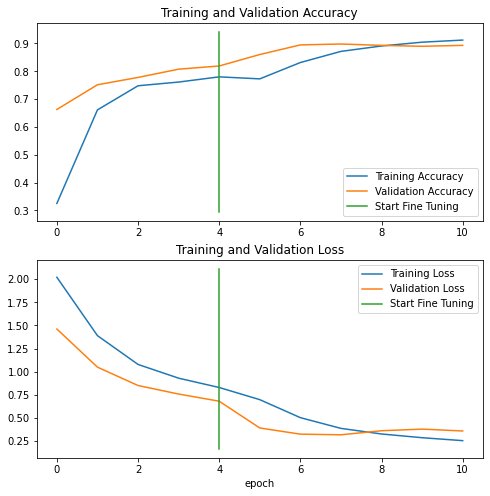

In [60]:
compare_historys(original_history= history_10_percent_data_aug,
                 new_history=history_fine_tune_10_class_full,
                 initial_epochs=5
                 )

In [63]:
!tensorboard dev upload --logdir ./transfer_learning \
--name "Transfer Learning Experiments" \
--description "A series of different transfer learning experiments with varing amount of data and fine tuning" \
--one_shot


***** TensorBoard Uploader *****

This will upload your TensorBoard logs to https://tensorboard.dev/ from
the following directory:

./transfer_learning

This TensorBoard will be visible to everyone. Do not upload sensitive
data.

Your use of this service is subject to Google's Terms of Service
<https://policies.google.com/terms> and Privacy Policy
<https://policies.google.com/privacy>, and TensorBoard.dev's Terms of Service
<https://tensorboard.dev/policy/terms/>.

This notice will not be shown again while you are logged into the uploader.
To log out, run `tensorboard dev auth revoke`.

Continue? (yes/NO) yes

Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=373649185512-8v619h5kft38l4456nm2dj4ubeqsrvh6.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=openid+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email&state=omX9eSWiI44071GUGV7nMZacsNHlUl&prompt=consent&access_type=o

In [64]:
!tensorboard dev list

https://tensorboard.dev/experiment/UvTDYwKWTzSBaz9orYBnxA/
	Name                 Transfer Learning Experiments
	Description          A series of different transfer learning experiments with varing amount of data and fine tuning
	Id                   UvTDYwKWTzSBaz9orYBnxA
	Created              2022-06-21 09:02:28 (29 seconds ago)
	Updated              2022-06-21 09:02:33 (24 seconds ago)
	Runs                 6
	Tags                 5
	Scalars              102
	Tensor bytes         0
	Binary object bytes  2589387
Total: 1 experiment(s)


In [65]:
!tensorboard dev delete --experiment_id UvTDYwKWTzSBaz9orYBnxA

Deleted experiment UvTDYwKWTzSBaz9orYBnxA.
